In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq

def singSyllable(K, P):
    Fs = 22050  # sampling frequency
    t = np.arange(0, 0.24, 1/Fs)  # time sample points

    # main diff equation
    def syrinx(y, t, K, P):
        b = 1000
        d = 10**8
        yprime = np.zeros(2)
        yprime[0] = y[1]
        yprime[1] = (P - b) * y[1] - K * y[0] - d * (y[0]**2) * y[1]
        return yprime

    # init condition
    y0 = [0.01, 0.01]

    # ode solver
    z = odeint(syrinx, y0, t, args=(K, P,))
    song = z[:, 0]

    return t, song

def plot_wave_and_fft(K, P):
    t, song = singSyllable(K, P)

    plt.figure(figsize=(12, 6))

    # Plot wave
    plt.subplot(2, 1, 1)
    plt.plot(t, song)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Calculate FFT
    Fs = 22050
    s_fft = fft(song)
    t_fft = fftfreq(len(t), 1/Fs)[0:len(t)//2]

    # Plot FFT
    plt.subplot(2, 1, 2)
    plt.plot(t_fft, 2.0/len(t) * np.abs(s_fft[0:len(t)//2]))
    plt.title('FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

def select_K_P():
    plt.figure(figsize=(8, 6))
    plt.xlabel('K')
    plt.ylabel('P')
    plt.title('Click on the contour to set K and P')

    K, P = plt.ginput(1)[0]
    plot_wave_and_fft(K, P)

select_K_P()


In [ ]:
%matplotlib qt


In [2]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from scipy import interpolate
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq
from ipywidgets import interact

class DataPointInputGUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Data Point Input")

        self.fig, self.ax = plt.subplots()
        self.ax.set_xlabel('P')
        self.ax.set_ylabel('K')
        self.ax.set_title('P vs K')
        self.ax.set_xlim(-1000, 3000)
        self.ax.set_ylim(10**8, 10**9)

        self.point = []
        self.ax.scatter([], [], color='blue')

        self.canvas = FigureCanvasTkAgg(self.fig, master=master)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onclick)

        self.button_clear = tk.Button(master, text="Clear Points", command=self.clear_points)
        self.button_clear.pack(side=tk.BOTTOM)
        self.button_simulate = tk.Button(master, text="Run Simulation", command=self.simulate)
        self.button_simulate.pack(side=tk.LEFT)

    def onclick(self, event):
        if event.inaxes == self.ax:
            x = event.xdata
            y = event.ydata
            self.point = (x,y)
            #self.points.append((x, y))
            self.update_plot()

    def update_plot(self):
        self.ax.clear()
        self.ax.set_xlabel('P')
        self.ax.set_ylabel('K')
        self.ax.set_title('P vs K')
        self.ax.set_xlim(-1000, 3000)
        self.ax.set_ylim(10**8, 10**9)
        if self.point:
            xs, ys = self.point
            self.ax.scatter(xs, ys, color='blue')
        self.canvas.draw()

    def clear_points(self):
        self.point = []
        self.update_plot()

    def simulate(self):
        K=self.point[1]
        P = self.point[0]
        t, song = self.singSyllable(K, P)

        plt.figure(figsize=(12, 6))

        # Plot wave
        plt.subplot(2, 1, 1)
        plt.plot(t, song)
        plt.title('Waveform')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

        # Calculate FFT
        Fs = 22050
        s_fft = fft(song)
        t_fft = fftfreq(len(t), 1/Fs)[0:len(t)//2]

        # Plot FFT
        plt.subplot(2, 1, 2)
        plt.plot(t_fft, 2.0/len(t) * np.abs(s_fft[0:len(t)//2]))
        plt.title('FFT')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')

        plt.tight_layout()
        plt.show()

    def singSyllable(self, K, P):
        Fs = 22050  # sampling frequency
        t = np.arange(0, 0.24, 1/Fs)  # time sample points

        # main diff equation
        def syrinx(y, t, K, P):
            b = 1000
            d = 10**8
            yprime = np.zeros(2)
            yprime[0] = y[1]
            yprime[1] = (P - b) * y[1] - K * y[0] - d * (y[0]**2) * y[1]
            return yprime

        # init condition
        y0 = [0.01, 0.01]

        # ode solver
        z = odeint(syrinx, y0, t, args=(K, P,))
        song = z[:, 0]

        return t, song



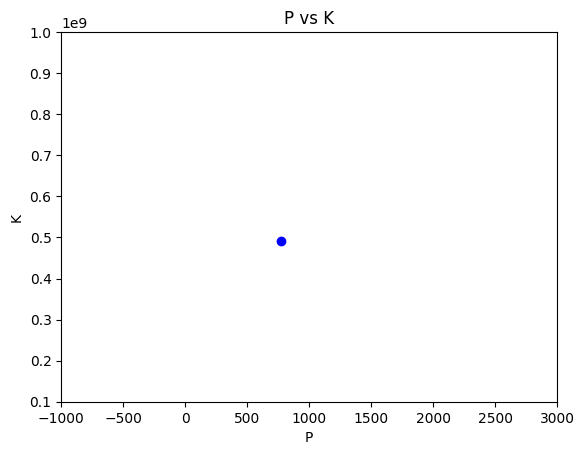

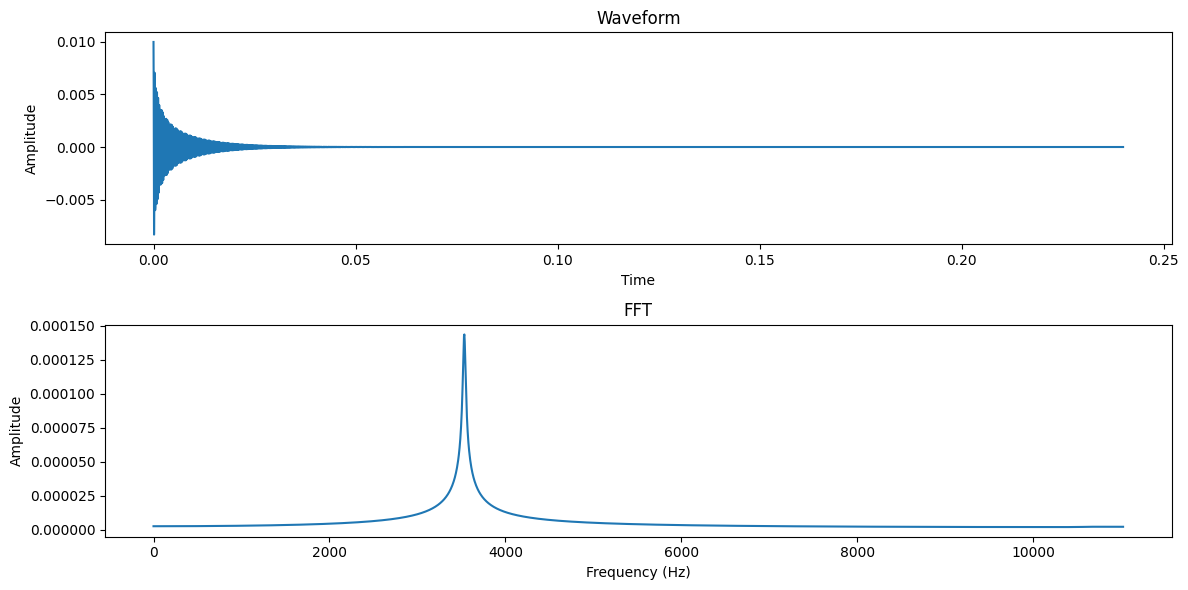

In [3]:
def main():
    root = tk.Tk()
    app = DataPointInputGUI(root)
    root.mainloop()

if __name__ == "__main__":
    main()

In [11]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from scipy import interpolate
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq
import matplotlib.gridspec as gridspec

class DataPointInputGUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Data Point Input")

        self.fig= plt.figure()
        #self.ax1.set(xlable='P',ylabel='K')
        self.gs = gridspec.GridSpec(8,8)
        self.ax1 = plt.subplot(self.gs[:4, :])
        self.ax2 = plt.subplot(self.gs[5:6, :])
        self.ax3 = plt.subplot(self.gs[7:, :])
        self.ax1.set_title('P vs K')
        self.ax1.set_xlim(-1000, 3000)
        self.ax1.set_ylim(10**8, 10**9)
        self.ax3.set_ylim(0 ,.009)
        self.ax2.set_xlim(.1,.1+1/2000)
        self.point = []
        self.ax1.scatter([], [], color='blue')

        #self.ax2.set(xlable='Time',ylabel='Amplitude')
        self.ax2.set_title('Waveform')


        #self.ax3.set(xlable='requency (Hz)',ylabel='Amplitude')
        self.ax3.set_title('FFT')

        self.canvas = FigureCanvasTkAgg(self.fig, master=master)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onclick)

        self.button_simulate = tk.Button(master, text="Run Simulation", command=self.simulate, padx = 30, pady = 10)
        self.button_simulate.pack(side=tk.BOTTOM)

    def onclick(self, event):
        if event.inaxes == self.ax1:
            x = event.xdata
            y = event.ydata
            self.point = (x,y)
            #self.points.append((x, y))
            self.update_plot()

    def update_plot(self):
        #self.ax1.set(xlable='P',ylabel='K')
        self.ax1.clear()
        self.ax1.set_title('P vs K')
        self.ax1.set_xlim(-1000, 3000)
        self.ax1.set_ylim(10**8, 10**9)
        if self.point:
            xs, ys = self.point
            self.ax1.scatter(xs, ys, color='blue')
        self.canvas.draw()

    def simulate(self):
        K=self.point[1]
        P = self.point[0]
        t, song = self.singSyllable(K, P)

        # Plot wave
        self.ax2.clear()
        self.ax3.clear()
        self.ax3.set_ylim(0 ,.009)
        self.ax2.set_xlim(.1,.1+1/2000)
        self.ax2.plot(t, song)
        #self.ax2.set(xlable='Time',ylabel='Amplitude')
        self.ax2.set_title('Waveform')

        # Calculate FFT
        Fs = 22050
        s_fft = fft(song)
        t_fft = fftfreq(len(t), 1/Fs)[0:len(t)//2]

        # Plot FFT
        self.ax3.plot(t_fft, 2.0/len(t) * np.abs(s_fft[0:len(t)//2]))
        #self.ax3.set(xlable='requency (Hz)',ylabel='Amplitude')
        self.ax3.set_title('FFT')

        self.canvas.draw()
        

    def singSyllable(self, K, P):
        Fs = 44100  # sampling frequency
        t = np.arange(0, 0.24, 1/Fs)  # time sample points

        # main diff equation
        def syrinx(y, t, K, P):
            b = 1000
            d = 10**8
            yprime = np.zeros(2)
            yprime[0] = y[1]
            yprime[1] = (P - b) * y[1] - K * y[0] - d * (y[0]**2) * y[1]
            return yprime

        # init condition
        y0 = [0.01, 0.01]

        # ode solver
        z = odeint(syrinx, y0, t, args=(K, P,))
        song = z[:, 0]

        return t, song




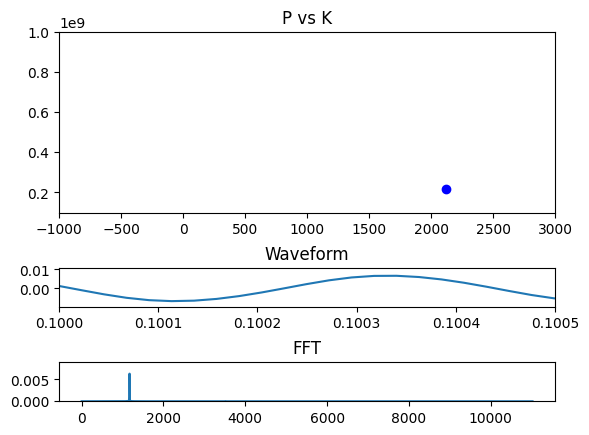

In [12]:
def main():
    root = tk.Tk()
    app = DataPointInputGUI(root)
    root.mainloop()

if __name__ == "__main__":
    main()